In [36]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta

# 設置MySQL資料庫連接
db_user = 'root'
db_password = '19970730'
db_host = '127.0.0.1'
db_name = 'sql_stock'

# 創建資料庫連接引擎
engine = create_engine(f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}')

# 設置日期範圍
#today = datetime(2024, 5, 25)
today = datetime.now().date()
#one_year_ago = today - timedelta(days=365)
one_year_ago = today - timedelta(days=730) #兩年看看

# 格式化日期
today_str = today.strftime('%Y%m%d')
one_year_ago_str = one_year_ago.strftime('%Y%m%d')



# SQL 查詢 加權指數
query_twse = f"""
SELECT *
FROM daily_twse
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# SQL 查詢 個股
query_updown = f"""
SELECT *
FROM daily_updown
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# 使用 pd.read_sql 來執行查詢並讀取數據到 DataFrame
twse_df_raw = pd.read_sql(query_twse, engine)

twse_updown_raw = pd.read_sql(query_updown, engine)


In [37]:
print(twse_updown_raw['總上漲下跌比'].describe())
print(twse_updown_raw['上市上漲下跌比'].describe())
print(twse_updown_raw['上櫃上漲下跌比'].describe())

count    485.000000
mean       1.479320
std        2.131106
min        0.010000
25%        0.530000
50%        1.040000
75%        1.790000
max       38.910000
Name: 總上漲下跌比, dtype: float64
count    485.000000
mean       1.580928
std        2.065762
min        0.010000
25%        0.520000
50%        1.080000
75%        1.980000
max       32.170000
Name: 上市上漲下跌比, dtype: float64
count    485.000000
mean       1.422495
std        2.575982
min        0.010000
25%        0.570000
50%        1.060000
75%        1.730000
max       52.400000
Name: 上櫃上漲下跌比, dtype: float64


In [38]:
twse_updown_raw[twse_updown_raw['上櫃上漲下跌比'] < 0.1]['Date']


34     2022-09-26
36     2022-09-28
44     2022-10-11
46     2022-10-13
407    2024-04-16
482    2024-08-05
Name: Date, dtype: object

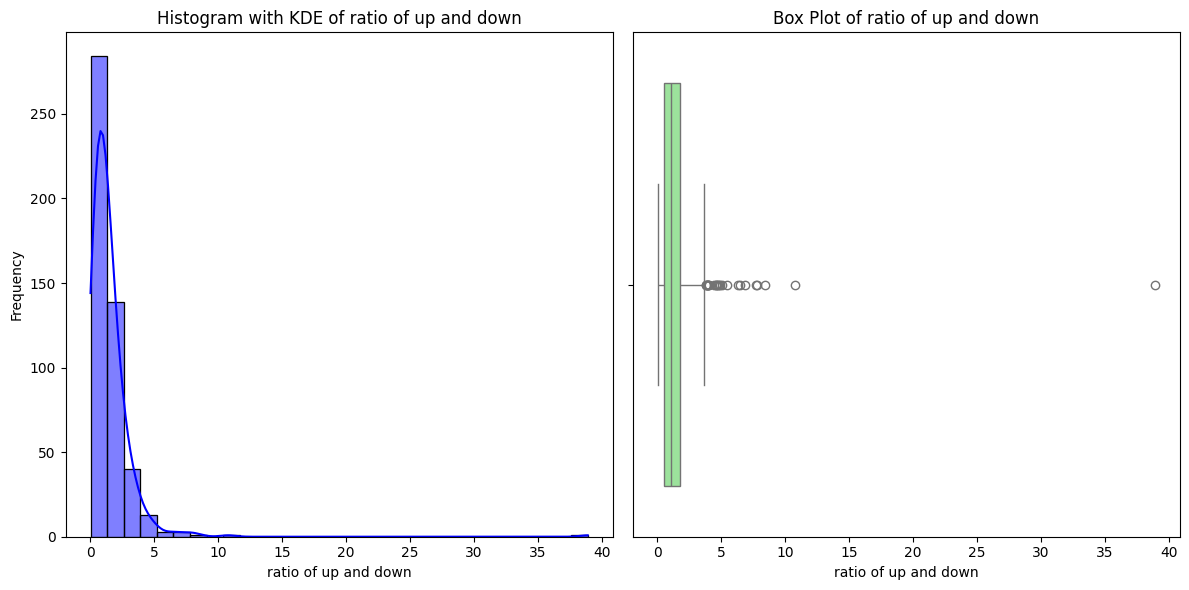

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經有一個 DataFrame twse_updown_raw
# twse_updown_raw = pd.read_csv('your_data.csv')

# 直方圖與密度圖
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(twse_updown_raw['總上漲下跌比'], bins=30, kde=True, color='blue')
plt.title('Histogram with KDE of ratio of up and down')
plt.xlabel('ratio of up and down')
plt.ylabel('Frequency')

# 箱型圖
plt.subplot(1, 2, 2)
sns.boxplot(x=twse_updown_raw['總上漲下跌比'], color='lightgreen')
plt.title('Box Plot of ratio of up and down')
plt.xlabel('ratio of up and down')

plt.tight_layout()
plt.show()

In [40]:
twse_index = twse_df_raw[twse_df_raw['指數名稱'] == '發行量加權股價指數'].copy()
twse_index['Date'] = pd.to_datetime(twse_index['Date'])

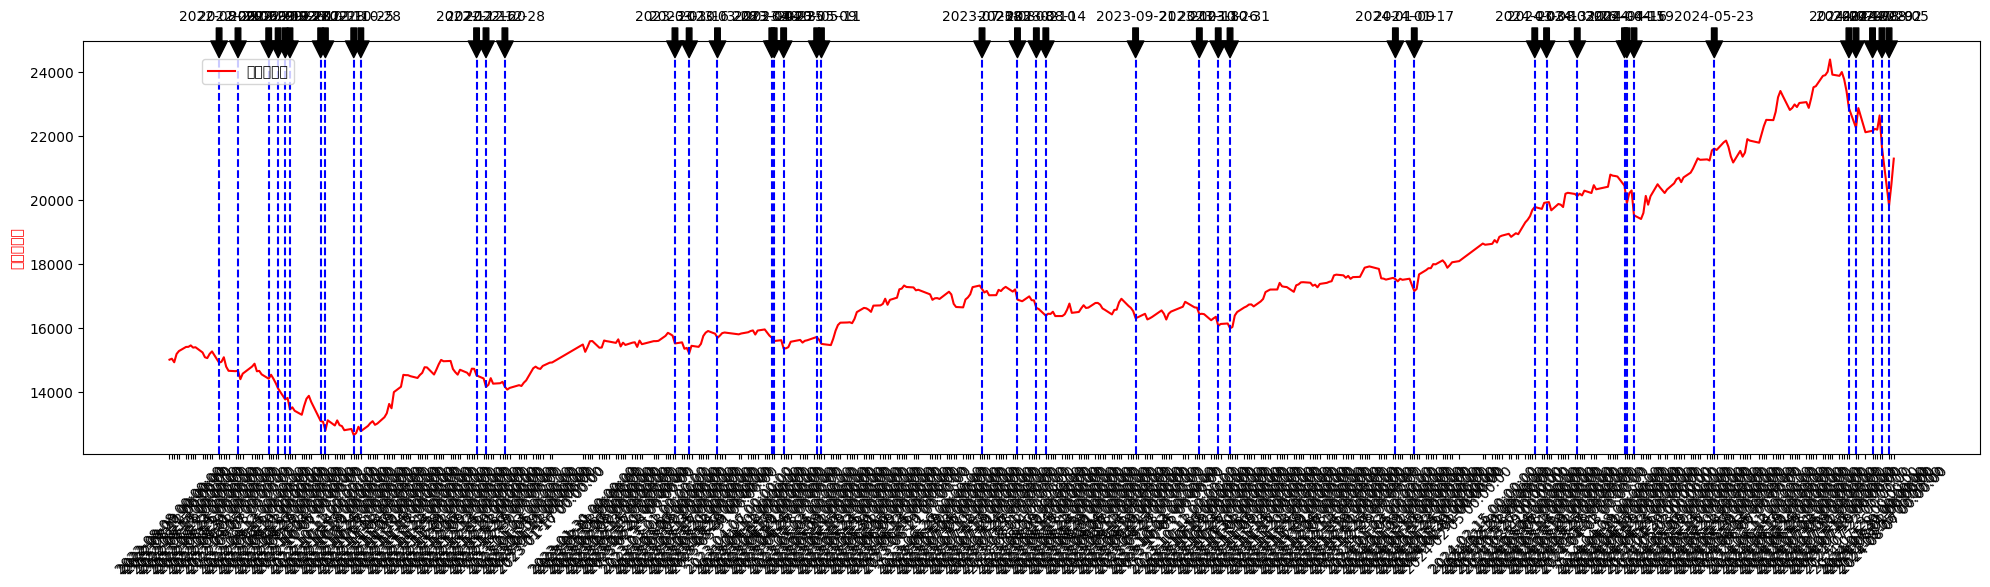

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# 禁用特定类型的警告
warnings.filterwarnings("ignore", category=UserWarning)

# 假設 twse_index 是你的 DataFrame
# twse_index = pd.read_csv('your_data.csv')

# 创建图表
fig, ax1 = plt.subplots(figsize=(20, 6))

# 绘制折线图
ax1.plot(twse_index['Date'], twse_index['價格指數值'], color='red', linestyle='-', label='價格指數值')

# 设置 x 轴的日期格式
ax1.set_xticks(twse_index['Date'])
ax1.set_xticklabels(twse_index['Date'], rotation=45)

# 设置第二个 y 轴的标签
ax1.set_ylabel('價格指數值', color='red')

# 添加特定日期的垂直线和文本标记
highlight_dates = twse_updown_raw[twse_updown_raw['上櫃上漲下跌比'] < 0.3]['Date']

for date in highlight_dates:
    date_timestamp = pd.Timestamp(date)
    ax1.axvline(date_timestamp, color='blue', linestyle='--')
    ax1.annotate(date,
                 xy=(date_timestamp, twse_index['價格指數值'].max()),  # Adjust y-coordinate as needed
                 xytext=(date_timestamp, twse_index['價格指數值'].max() * 1.05),  # Adjust text position
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center')

# 添加图例
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# 自动调整布局以适应标签
fig.tight_layout()

# 显示图表
plt.show()
